In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import stochtrans1D

In [2]:
deterministic_model = stochtrans1D.StochSaddleNode(0)
xinit = [-1.0,-0.5,0,0.5,-2.0,-5.0]
from scipy.special import ai_zeros
tstar = -ai_zeros(1)[0][0]

In [3]:
stoch_model_00 = stochtrans1D.StochSaddleNode(10.0)
stoch_model_0 = stochtrans1D.StochSaddleNode(1.0)
stoch_model_1 = stochtrans1D.StochSaddleNode(0.1)
stoch_model_2 = stochtrans1D.StochSaddleNode(0.01)

# The deterministic system

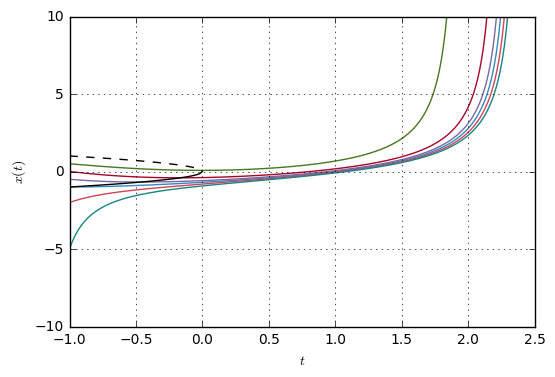

In [3]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(x0,-1.0,T=4,dt=0.01) for x0 in xinit])

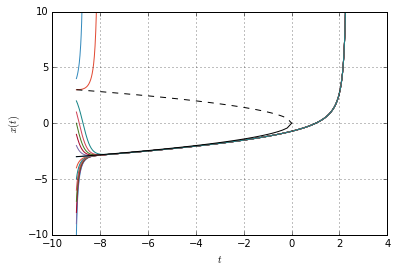

In [13]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(x0,-9.0,T=12,dt=0.01) for x0 in xrange(-10,5)])

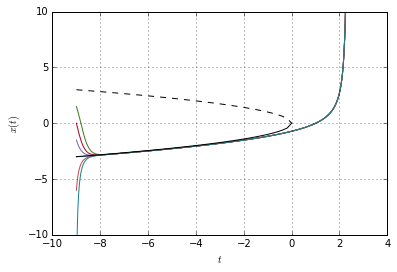

In [14]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

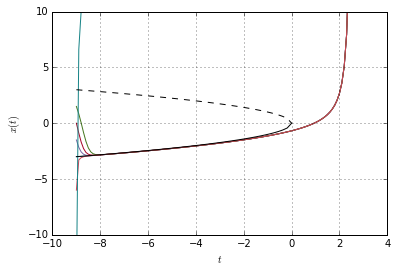

In [15]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(3*x0,-9.0,T=12,dt=0.1) for x0 in xinit])

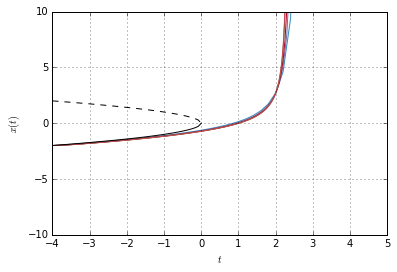

In [16]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(-2.0,-4.0,T=12,dt=deltat) for deltat in [0.2,0.1,0.05,0.01,0.005]])

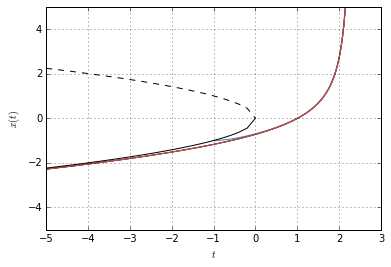

In [18]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(-np.sqrt(np.abs(t0)),t0,T=np.abs(t0)+4,dt=0.01) for t0 in [-1.0,-9.0,-100.0,-400.0,-900.0]],ylim=(-5,5),xlim=(-5,3))

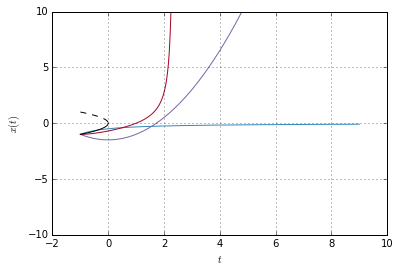

In [120]:
deterministic_model.trajectoryplot(stochtrans1D.StochModel(lambda x,t: x**2,0).trajectory(-1.0,-1.0,T=10,dt=0.01),stochtrans1D.StochModel(lambda x,t: t,0).trajectory(-1.0,-1.0,T=10,dt=0.01),deterministic_model.trajectory(-1.0,-1.0,T=10,dt=0.01))

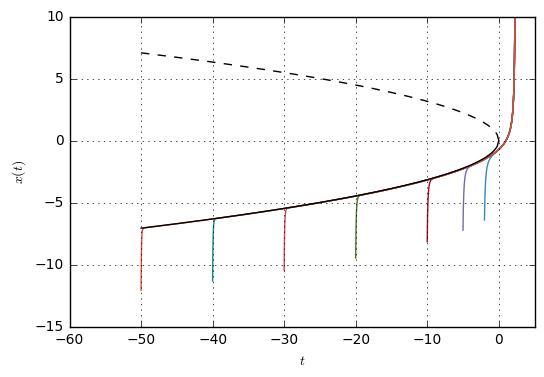

In [4]:
deterministic_model.trajectoryplot(*[deterministic_model.trajectory(-np.sqrt(np.abs(t0))-5,t0,T=np.abs(t0)+3,dt=0.01) for t0 in [-2,-5,-10,-20,-30,-40,-50]],xlim=(-60,5),ylim=(-15,10))

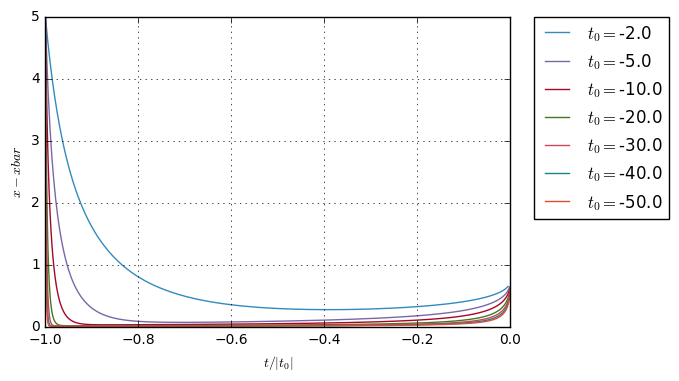

In [5]:
t0list = [-2,-5,-10,-20,-30,-40,-50]
traj = [deterministic_model.trajectory(-np.sqrt(np.abs(t0))-5,t0,T=np.abs(t0)+3,dt=0.01) for t0 in t0list]
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set_xlabel('$t/|t_0|$')
ax.set_ylabel('$x-xbar$')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim((2,3))
for t,x in traj:
    x = x[t<0]
    t = t[t<0]
    xbar = -np.sqrt(-t)
    ax.plot(t/np.abs(t[0]),np.abs(x-xbar),label='$t_0=$'+str(t[0]))
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
plt.show()

## What happens in $-\infty$

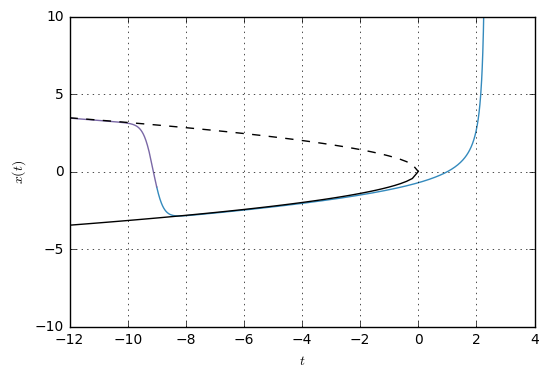

In [4]:
deterministic_model.trajectoryplot(deterministic_model.trajectory(-1.0,-9.0,T=12,dt=0.01),deterministic_model.trajectory(-1.0,-9.0,T=3,dt=-0.01))

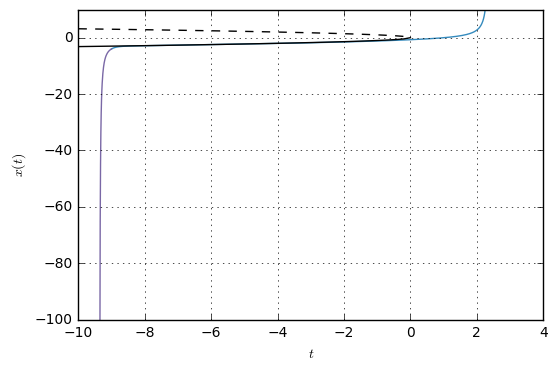

In [38]:
deterministic_model.trajectoryplot(deterministic_model.trajectory(-4.0,-9.0,T=12,dt=0.01),deterministic_model.trajectory(-4.0,-9.0,T=3,dt=-0.01),ylim=(-100,10))

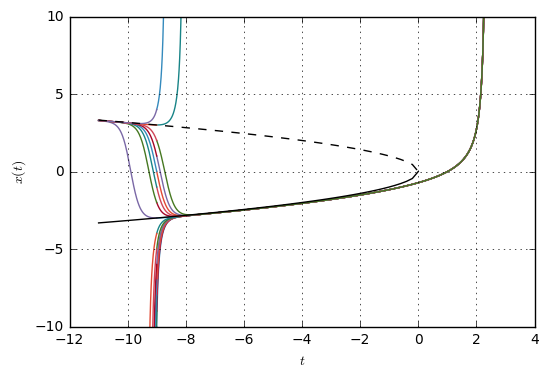

In [32]:
deterministic_model.trajectoryplot(*sum([[deterministic_model.trajectory(x0,-9.0,T=12,dt=0.01),deterministic_model.trajectory(x0,-9.0,T=2,dt=-0.01)] for x0 in xrange(-10,5)],[]))

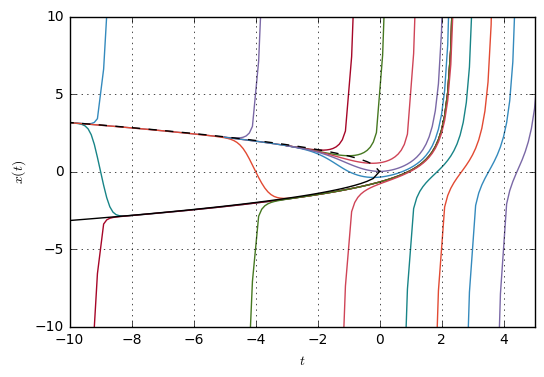

In [85]:
def forbacktraj(x0,t0):
    tfor,xfor = deterministic_model.trajectory(x0,t0,T=abs(t0)+3,dt=0.1)
    tback,xback = deterministic_model.trajectory(x0,t0,T=abs(t0)+3,dt=-0.1)
    return (np.concatenate((tback[:0:-1],tfor)),np.concatenate((xback[:0:-1],xfor)))
deterministic_model.trajectoryplot(
    forbacktraj(5.0,-9.0),forbacktraj(5.0,-4.0),forbacktraj(5.0,-1.0),forbacktraj(5.0,0.0),forbacktraj(5.0,1.0),    
    forbacktraj(0.0,-9.0),forbacktraj(0.0,-4.0),forbacktraj(0.0,-1.0),forbacktraj(0.0,0.0),
    forbacktraj(-5.0,-9.0),forbacktraj(-5.0,-4.0),forbacktraj(-5.0,-1.0),forbacktraj(-5.0,1.0),forbacktraj(-5.0,2.0),forbacktraj(-5.0,3.0),forbacktraj(-5.0,4.0),
    xlim=(-10,5))

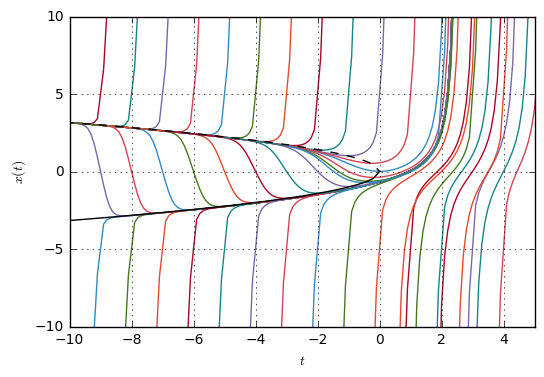

In [86]:
deterministic_model.trajectoryplot(*[forbacktraj(x0,t0) for t0 in xrange(-9,5) for x0 in [-5.0,0.0,5.0]], xlim=(-10,5))

## Blowup time in the deterministic model

In [5]:
deterministic_model.blowuptime(-10.0,-100.0,T=103,dt=0.0001)

2.3395

In [6]:
deterministic_model.blowuptime(-3.0,-9.0,T=13,dt=0.0001)

2.3395

In [8]:
tstar

2.3381074104597674

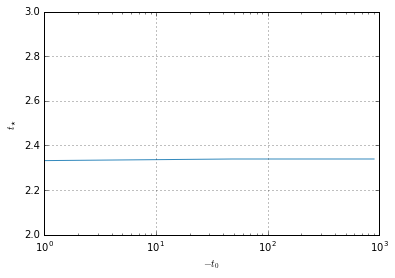

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set_xlabel('$-t_0$')
ax.set_ylabel('$t_\star$')
ax.set_xscale('log')
ax.set_ylim((2,3))
initcond = np.linspace(-900,-1,num=20)
ax.plot(-initcond,[deterministic_model.blowuptime(-np.sqrt(np.abs(t0)),t0,T=np.abs(t0)+4,dt=0.0001) for t0 in initcond])
plt.show()

In [11]:
t,x=deterministic_model.trajectory(-10.0,-100.0,T=103,dt=0.0001,finite=True)

In [12]:
(x*(tstar-t))[-10:]

array([  3.95257425e+00,   5.05550766e+00,   7.22028399e+00,
         1.25695591e+01,   3.24284554e+01,   1.94258011e+02,
         7.21718311e+03,   1.15871460e+07,   3.35199213e+13,
         0.00000000e+00], dtype=float32)

In [13]:
x[-10:]

array([  4.39160205e+03,   6.32021924e+03,   1.03147363e+04,
         2.09541152e+04,   6.48616094e+04,   4.85564438e+05,
         2.40628460e+07,   5.79261153e+10,   3.35543530e+17,
         1.12589462e+31], dtype=float32)

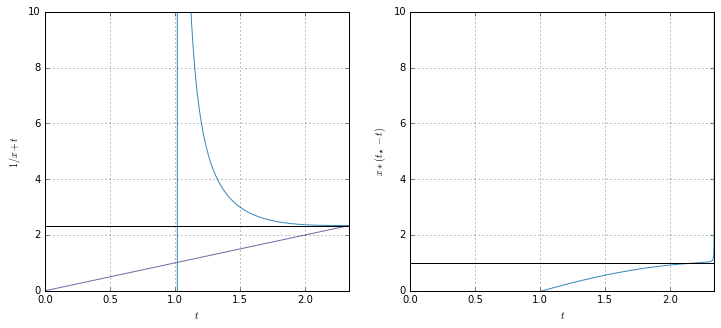

In [323]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
for ax in (ax1,ax2):
    ax.set_xlabel('$t$')
    ax.set_xlim([0,tstar])
    ax.set_ylim([0,10])
    ax.grid()
ax1.set_ylabel('$1/x+t$')
ax2.set_ylabel('$x*(t_\star-t)$')
ax1.plot(t,1/x+t)
ax1.plot(t,t)
ax1.axhline(y=tstar,color='black')
ax2.plot(t,x*(tstar-t))
ax2.axhline(y=1,color='black')
plt.show()

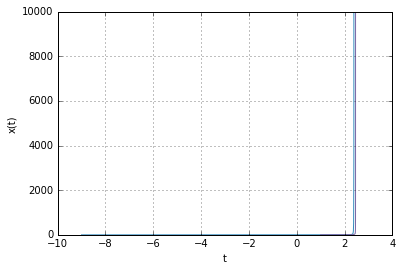

In [207]:
t0,x0 = (-9.0,-3.0)
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_ylim([0,10000])
ax.grid()
ax.plot(*deterministic_model.trajectory(x0,t0,T=13,dt=0.01))
#ax.plot(*stochtrans1D.StochModel(lambda x,t: x**2,0).trajectory(x0,t0,T=13,dt=0.01))
t = np.linspace(1.0,3.0,num=10000)
x = 1/(tstar-t)
ax.plot(t[x>0],x[x>0])
plt.show()

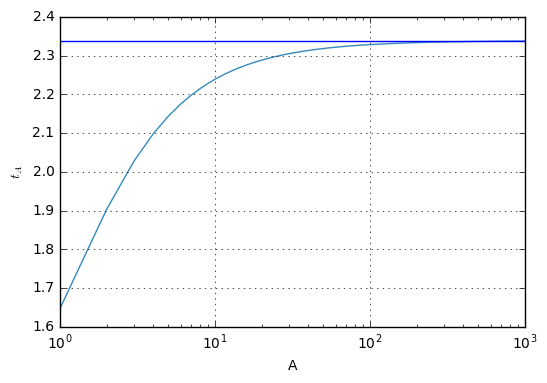

In [39]:
fig = plt.figure()
ax  = plt.axes() 
ax.set_xlabel('A')
ax.set_ylabel('$t_A$')
#ax.set_ylim([0,3])
ax.set_xscale('log')
#ax.set_yscale('log')
ax.grid()
ax.plot(*zip(*[(A,deterministic_model.firstpassagetime(-3.0,-9.0,A,dt=0.0001)) for A in np.arange(1.0,1000.0)]))
#ax.axhline(y=deterministic_model.blowuptime(-3.0,-9.0,T=13,dt=0.001))
ax.axhline(y=tstar)
#ax.plot(np.linspace(0.1,20),2.7-1.0/np.linspace(0.1,20))
plt.show()

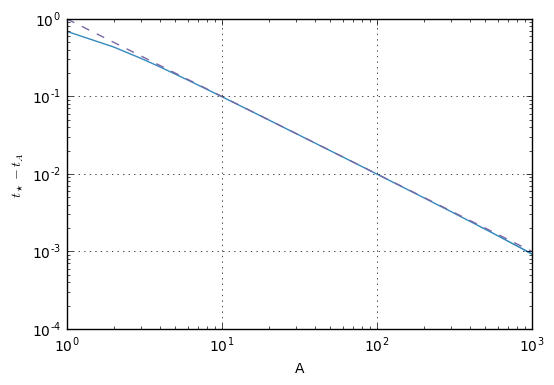

In [40]:
fig = plt.figure()
ax  = plt.axes() 
ax.set_xlabel('A')
ax.set_ylabel('$t_\star-t_A$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
Arange = np.arange(1.0,1000.0)
ax.plot(*zip(*[(A,tstar-deterministic_model.firstpassagetime(-3.0,-9.0,A,dt=0.00001)) for A in Arange]))
ax.plot(Arange,1/Arange,linestyle='dashed')
plt.show()

In [99]:
time = [deterministic_model.escapetime_sample(-3.0,-9.0,A,ntraj=1) for A in np.linspace(0,20)]

In [118]:
deterministic_model.escapetime_sample(-3.0,-9.0,1000000000,ntraj=1,dt=0.01)

array([ 2.43010879], dtype=float32)

In [102]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(lambda t,x: x+1./t,np.linspace(0,20),time)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

# The stochastic system

## Example trajectories

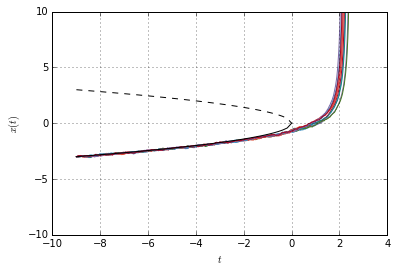

In [4]:
stoch_model_2.trajectoryplot(*[stoch_model_2.trajectory(-3.0,-9.0,T=12,dt=0.01) for k in xrange(0,10)])

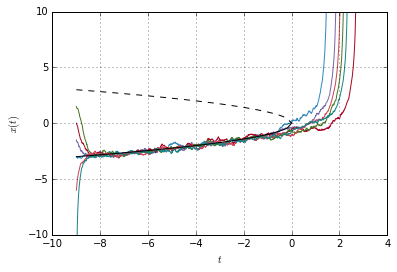

In [18]:
stoch_model_1.trajectoryplot(*[stoch_model_1.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

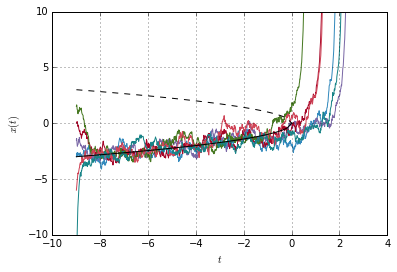

In [34]:
stoch_model_0.trajectoryplot(*[stoch_model_0.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

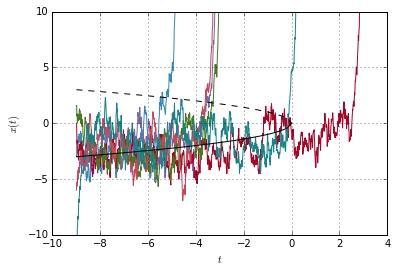

In [36]:
stoch_model_00.trajectoryplot(*[stoch_model_00.trajectory(3*x0,-9.0,T=12,dt=0.01) for x0 in xinit])

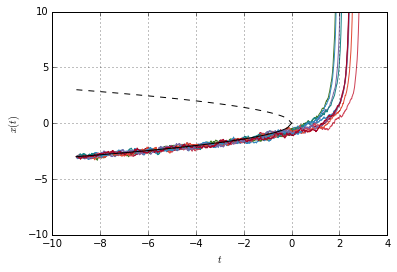

In [19]:
stoch_model_1.trajectoryplot(*[stoch_model_1.trajectory(-3.0,-9.0,T=12,dt=0.01) for k in xrange(0,10)])

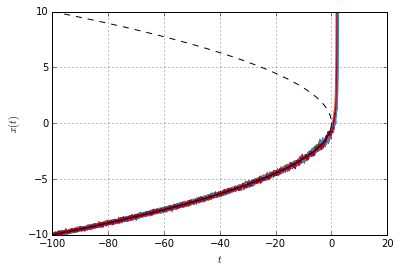

In [41]:
stoch_model_1.trajectoryplot(*[stoch_model_1.trajectory(-10.0,-100.0,T=105,dt=0.01) for k in xrange(0,10)])

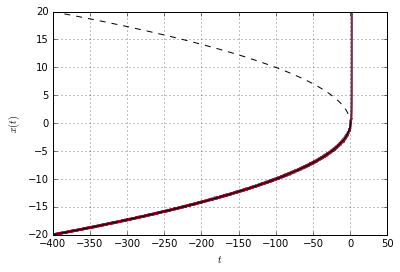

In [30]:
stoch_model_1.trajectoryplot(*[stoch_model_1.trajectory(-20.0,-400.0,T=405,dt=0.01) for k in xrange(0,10)],ylim=(-20,20))

## Role of initial time and timestep

In [4]:
def plottraj(D0t0Tdt_list,**kwargs):
    stochtrans1D.StochSaddleNode.trajectoryplot(
        *[stochtrans1D.StochSaddleNode(D0).trajectory(-np.sqrt(np.abs(t0)),t0,T=T,dt=dt) for D0,t0,T,dt in D0t0Tdt_list],**kwargs)

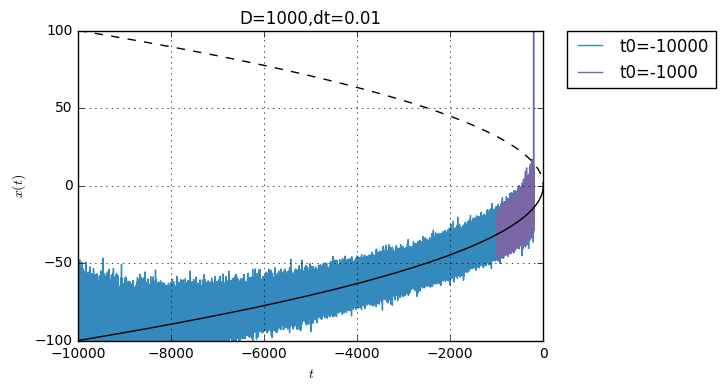

In [5]:
plottraj([(1000.0,t0,np.abs(t0)+13,0.01) for t0 in [-10000.0,-1000.0]],ylim=(-100,100),labels=["t0=-10000","t0=-1000"],title="D=1000,dt=0.01")

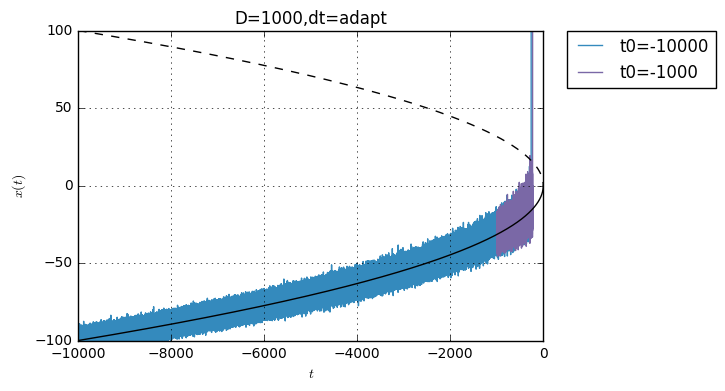

In [6]:
plottraj([(1000.0,t0,np.abs(t0)+13,'adapt') for t0 in [-10000.0,-1000.0]],ylim=(-100,100),labels=["t0=-10000","t0=-1000"],title="D=1000,dt=adapt")

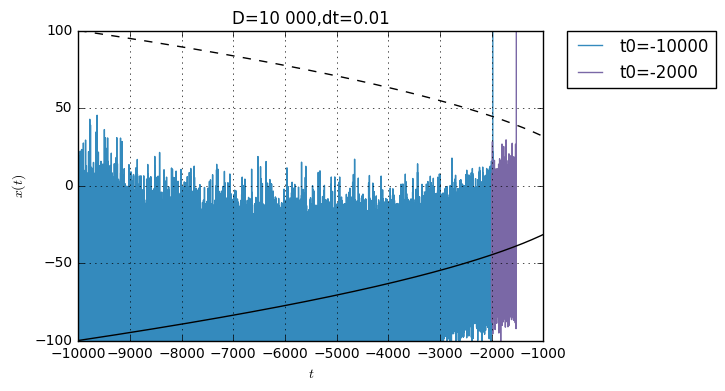

In [9]:
plottraj([(10000.0,t0,np.abs(t0)+13,0.01) for t0 in [-10000.0,-2000.0]],ylim=(-100,100),labels=["t0=-10000","t0=-2000"],title="D=10 000,dt=0.01")

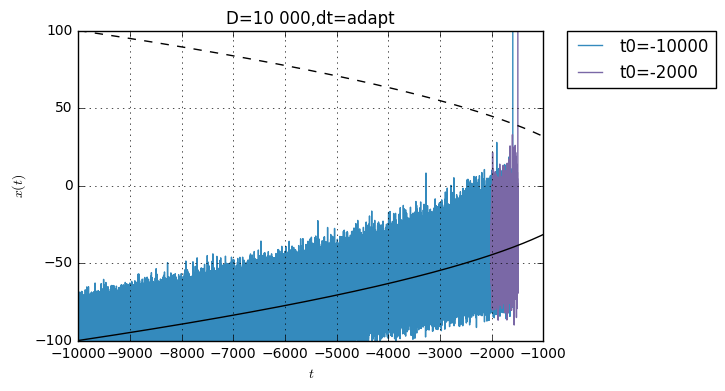

In [10]:
plottraj([(10000.0,t0,np.abs(t0)+13,'adapt') for t0 in [-10000.0,-2000.0]],ylim=(-100,100),labels=["t0=-10000","t0=-2000"],title="D=10 000,dt=adapt")

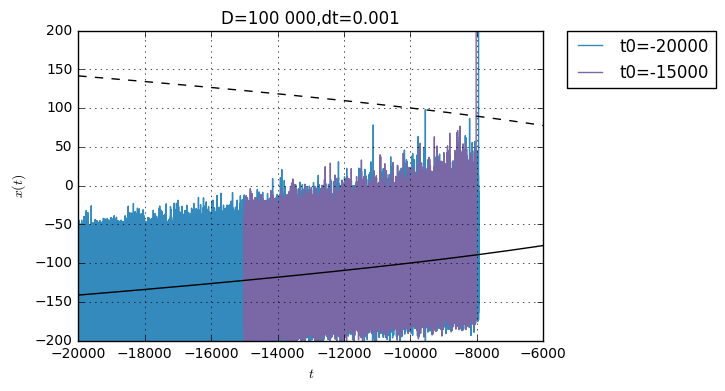

In [12]:
plottraj([(100000.0,t0,-7000-t0,0.001) for t0 in [-20000.0,-15000.0]],ylim=(-200,200),labels=["t0=-20000","t0=-15000"],title="D=100 000,dt=0.001")

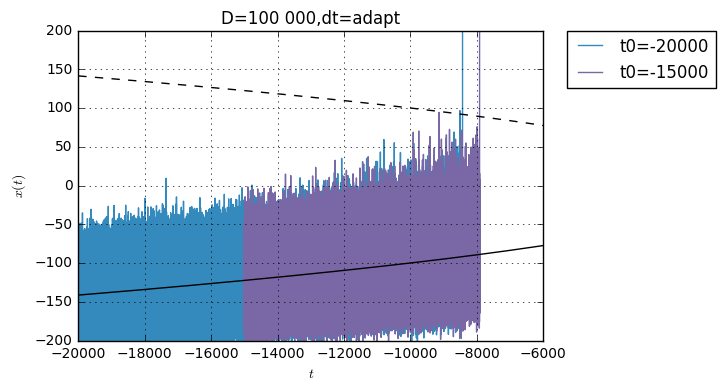

In [16]:
plottraj([(100000.0,t0,-7000-t0,'adapt') for t0 in [-20000.0,-15000.0]],ylim=(-200,200),labels=["t0=-20000","t0=-15000"],title="D=100 000,dt=adapt")

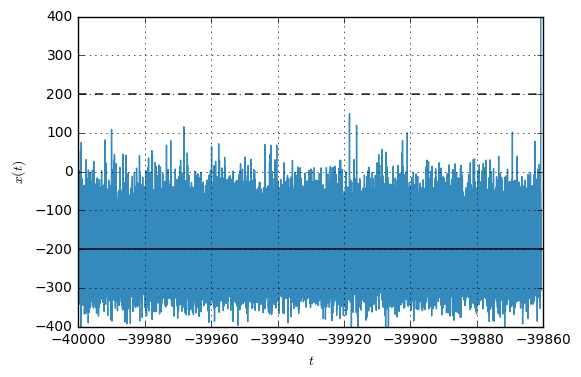

In [87]:
stochtrans1D.StochSaddleNode.trajectoryplot(stochtrans1D.StochSaddleNode(1000000.0).trajectory(-np.sqrt(np.abs(-40000.0)),-40000.0,T=13000,dt=0.001),ylim=(-400,400))

In [111]:
t,x=stochtrans1D.StochSaddleNode(1000000.0).trajectory(-np.sqrt(np.abs(-100000.0)),-100000.0,T=100000,dt=0.001)

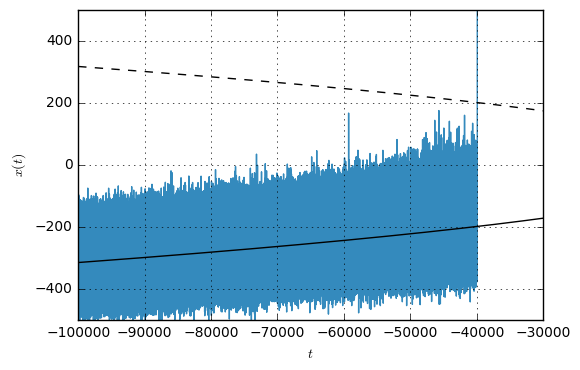

In [114]:
stochtrans1D.StochSaddleNode.trajectoryplot((t[::10],x[::10]),ylim=(-500,500))

In [12]:
test_trajs=[stochtrans1D.StochSaddleNode(1000000.0).trajectory(-np.sqrt(np.abs(-100000.0)),-100000.0,T=100000,dt='adapt') for k in xrange(4)]

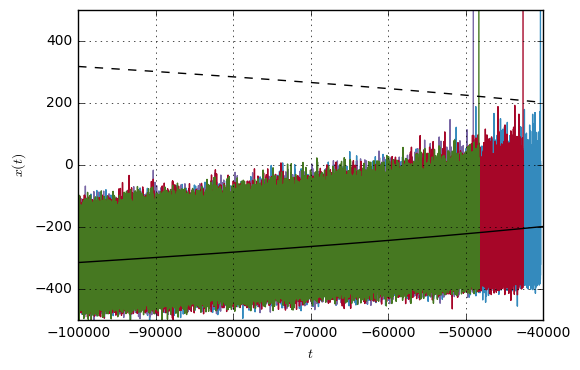

In [13]:
stochtrans1D.StochSaddleNode.trajectoryplot(*[(t[::10],x[::10]) for t,x in test_trajs],ylim=(-500,500))

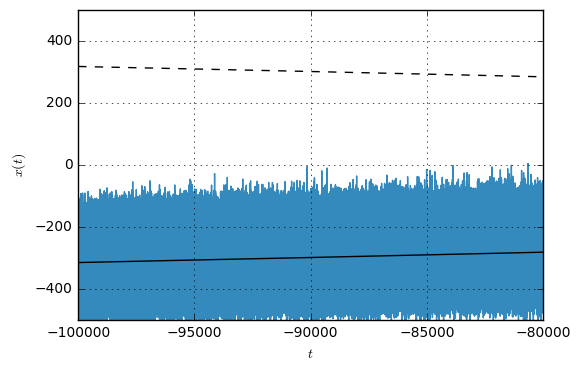

In [97]:
stochtrans1D.StochSaddleNode.trajectoryplot(stochtrans1D.StochSaddleNode(1000000.0).trajectory(-np.sqrt(np.abs(-100000.0)),-100000.0,T=20000,dt=0.001),ylim=(-500,500))

## Testing numerical convergence of the statistics

In [268]:
def myaccumean(array):
    return reduce(lambda l,a: l+[l[-1]+a],array,[0])[1:]/np.arange(1,len(array)+1)
def accumean(array):
    return np.cumsum(array)/np.arange(1,len(array)+1)
samples = stoch_model_1.escapetime_sample(-3,-9,10,ntraj=100000)
from timeit import default_timer as timer
start = timer()
avg1 = myaccumean(samples)
time1 = timer() - start
start = timer()
avg2 = accumean(samples)
time2 = timer() - start
print "Home-made method: %f s; Numpy method: %f s; Agreement: %s" % (time1,time2,np.allclose(avg1,avg2))

Home-made method: 15.407758 s; Numpy method: 0.001017 s; Agreement: True


In [281]:
def accumean(array):
    return np.cumsum(array)/np.arange(1,len(array)+1)

def accustd(array):
    return np.sqrt(np.abs(accumean(array**2)-accumean(array)**2))

In [290]:
def escapetime_test_cvg(accufun,fun,label,x0,t0,A,*args,**kwargs):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$n_{iter}$')
    ax.set_ylabel(label)
    ax.set_xscale('log')
    plt.grid()
    maxtraj = kwargs.get('maxtraj',10000)
    for model in args:
        samples = model.escapetime_sample(x0,t0,A,ntraj=maxtraj,**kwargs)
        line, = ax.plot(np.arange(1,len(samples)+1),accufun(samples),linewidth=2,label='$\epsilon=$'+str(model.D0))
        ax.axhline(y=fun(samples),linewidth=1,color=line.get_color(),linestyle='dashed')
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

def escapetime_avg_cvg(x0,t0,A,*args,**kwargs):
    escapetime_test_cvg(accumean,np.mean,'$<t_\star>$',x0,t0,A,*args,**kwargs)
    
def escapetime_std_cvg(x0,t0,A,*args,**kwargs):
    escapetime_test_cvg(accustd,np.std,'$\sigma$',x0,t0,A,*args,**kwargs)

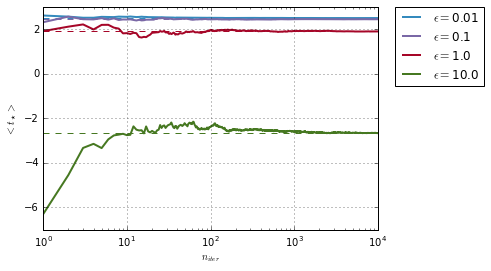

In [291]:
escapetime_avg_cvg(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,maxtraj=10000)

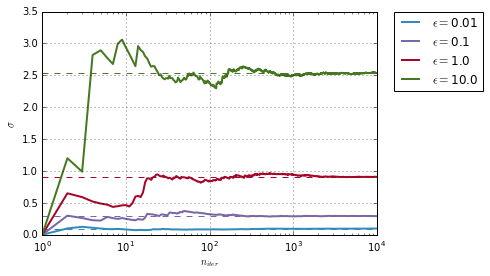

In [292]:
escapetime_std_cvg(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,maxtraj=10000)

## Statistics as a function of the parameters

Let us first compute some samples for an initial condition far back in time. Since these are pretty expensive to compute, we store them in memory for future use. Computations with later initial conditions are not so expensive.

In [105]:
from timeit import default_timer as timer
epsvals = np.array([x*10.0**n for n in xrange(1,4) for x in xrange(1,10)])
start = timer()
samples = np.array([stochtrans1D.StochSaddleNode(eps).escapetime_sample(-30,-900,20) for eps in epsvals])
time = timer()-start
print "Samples computed in %f s" % time
avgt = np.mean(samples,axis=1)
stdt = np.std(samples,axis=1)

Samples computed in 1417.377904 s


In [127]:
samples.nbytes

10800000

In [17]:
from timeit import default_timer as timer
epsbigvals = np.array([x*10.0**n for n in xrange(3,4) for x in xrange(1,10)])
t0 = -1000
start = timer()
samplesbig = np.array([stochtrans1D.StochSaddleNode(eps).escapetime_sample(-np.sqrt(np.abs(t0)),t0,20) for eps in epsbigvals])
time = timer()-start
print "Large epsilon samples computed in %f s" % time
avgtbig = np.mean(samplesbig,axis=1)

Large epsilon samples computed in 158.968706 s


In [18]:
epsbigvals

array([ 1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,
        9000.])

In [19]:
avgtbig

array([-264.66192627, -479.60452271, -684.4644165 , -852.77960205,
       -944.26898193, -977.94073486, -989.8482666 , -994.48535156,
       -996.61328125], dtype=float32)

In [ ]:
from timeit import default_timer as timer
epsbigvals = np.array([x*10.0**n for n in xrange(3,4) for x in xrange(1,10)])
t0 = -10000
start = timer()
samplesbig = np.array([stochtrans1D.StochSaddleNode(eps).escapetime_sample(-np.sqrt(np.abs(t0)),t0,20) for eps in epsbigvals])
time = timer()-start
print "Large epsilon samples computed in %f s" % time
avgtbig = np.mean(samplesbig,axis=1)

Large epsilon samples computed in 58704.593498 s


In [155]:
avgtbig

array([ -265.01321411,  -480.22094727,  -686.82061768,  -917.57714844,
       -1504.97314453, -3737.46582031, -7720.37841797, -9696.90039062,
       -9919.49316406], dtype=float32)

In [153]:
avgt

array([  -3.02903032,   -7.73963022,  -12.12785244,  -16.25855446,
        -20.21803284,  -24.09930801,  -27.79389954,  -31.39700508,
        -34.91747284,  -38.36693954,  -69.96987915,  -98.19338989,
       -124.40396118, -149.37809753, -173.50752258, -196.99084473,
       -219.845047  , -242.50765991, -264.84872437, -479.74609375,
       -679.04229736, -816.03997803, -870.95880127, -888.23608398,
       -894.19616699, -896.60253906, -897.77337646], dtype=float32)

### Mean first passage time (*escape time*)

In [4]:
def escapetime_avg(x0,t0,*args,**kwargs):
    sub = {'tstar': tstar, 't0': t0}    
    def ylabel(**kwargs):
        sgnlbl = {'abs': ('|','|')}
        sublbl = {'tstar': '-t_\star', 't0': '-t_0'}
        a,b=sgnlbl.get(kwargs.get('sign'),('',''))
        return '$'+a+'<t_A>'+sublbl.get(kwargs.get('subtract'),'')+b+'$'
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$\epsilon$')
    ax.set_ylabel(ylabel(**kwargs))
    ax.set_xscale('log')
    ax.set_yscale(kwargs.get('yscale','linear'))
    ax.grid()
    if ax.get_yscale() == 'linear':
        ax.axhline(y=t0,linewidth=1,color='black')
    epsvals = np.array([x*10.0**n for n in kwargs.get('eps_exp_range',xrange(-2,3)) for x in xrange(1,10)])
    for A in args:
        avgt = np.array([np.mean(stochtrans1D.StochSaddleNode(eps).escapetime_sample(x0,t0,A,**kwargs)) for eps in epsvals])
        det_avgt = deterministic_model.escapetime_sample(x0,t0,A,ntraj=1)
        avgt -= sub.get(kwargs.get('subtract'),0)
        det_avgt -= sub.get(kwargs.get('subtract'),0)
        if kwargs.get('sign') == 'abs': 
            avgt = np.abs(avgt)
            det_avgt = np.abs(det_avgt)
        if ax.get_yscale() == 'log':
            line, = ax.plot(epsvals[avgt > 0],avgt[avgt > 0],linewidth=2,label='A='+str(A))
        else:
            line, = ax.plot(epsvals,avgt,linewidth=2,label='A='+str(A))
            ax.axhline(y=det_avgt,linewidth=1,color=line.get_color(),linestyle='dashdot')
    for fun in kwargs.get('fit',()):
        ax.plot(epsvals,fun(epsvals))
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

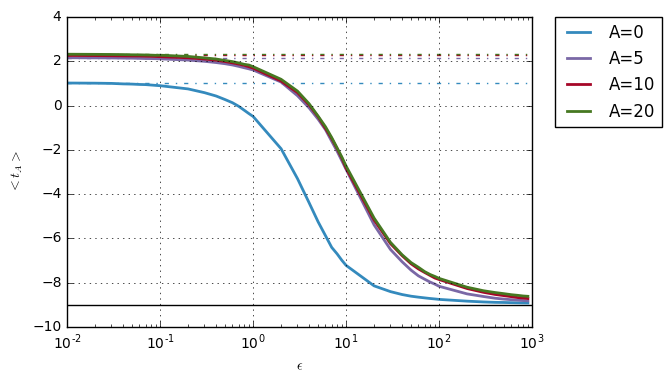

In [34]:
escapetime_avg(-3,-9,0,5,10,20,ntraj=10000)

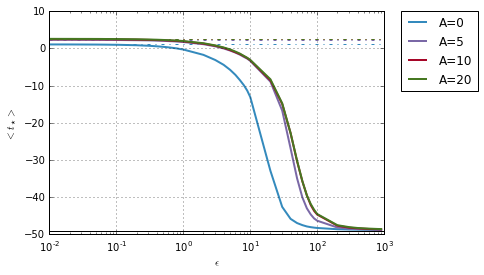

In [10]:
escapetime_avg(-7,-49,0,5,10,20,ntraj=10000)

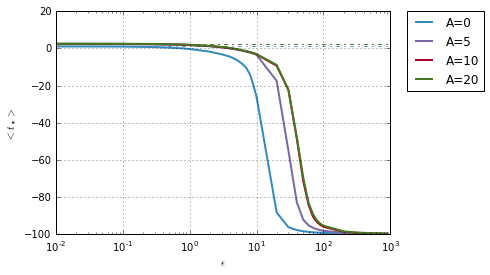

In [21]:
escapetime_avg(-10,-100,0,5,10,20,ntraj=10000)

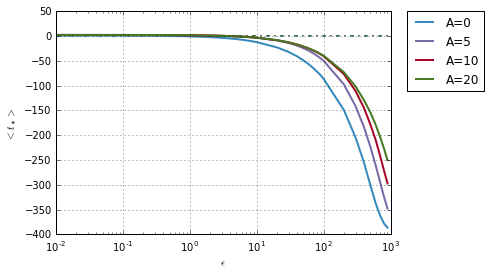

In [10]:
escapetime_avg(-20,-400,0,5,10,20,ntraj=10000)

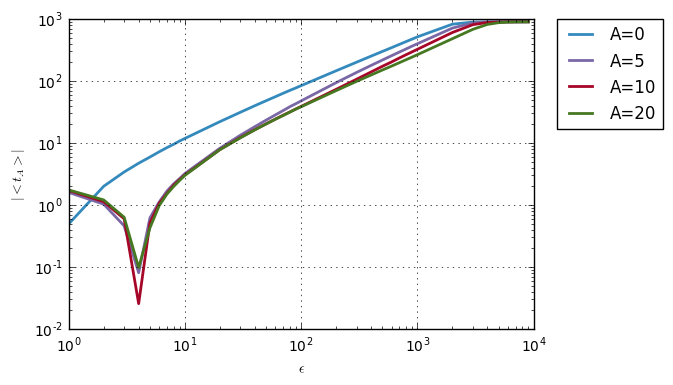

In [33]:
escapetime_avg(-30,-900,0,5,10,20,ntraj=10000,yscale='log',eps_exp_range=range(0,4),sign='abs')

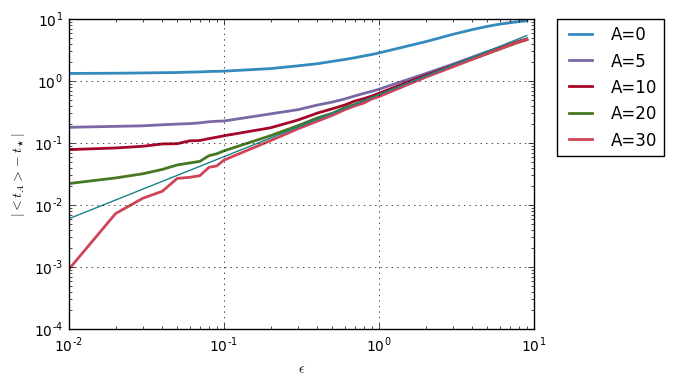

In [7]:
escapetime_avg(-3,-9,0,5,10,20,30,ntraj=10000,eps_exp_range=range(-2,1),subtract='tstar',sign='abs',yscale='log',fit=(lambda eps: 0.6*eps,))

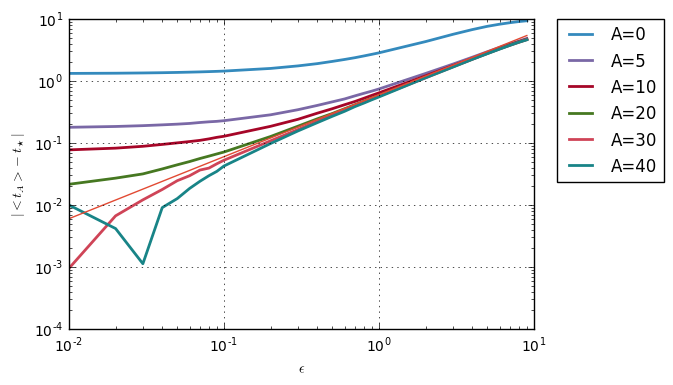

In [11]:
escapetime_avg(-3,-9,0,5,10,20,30,40,ntraj=100000,eps_exp_range=range(-2,1),subtract='tstar',sign='abs',yscale='log',fit=(lambda eps: 0.6*eps,))

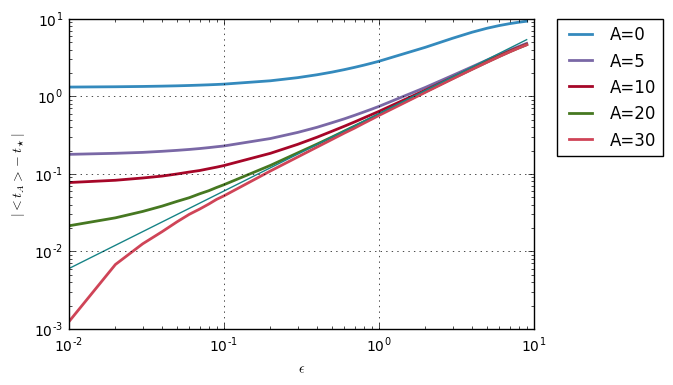

In [10]:
escapetime_avg(-3,-9,0,5,10,20,30,ntraj=1000000,eps_exp_range=range(-2,1),subtract='tstar',sign='abs',yscale='log',fit=(lambda eps: 0.6*eps,))

In [45]:
def escapetime_avg_finitesizeeffects(*args,**kwargs):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$\epsilon$')
    ax.set_ylabel('$<t_\star>$')
    ax.set_yscale(kwargs.get('yscale','linear'))
    ax.set_xscale('log')
    ax.grid()
    epsvals = np.array([x*10.0**n for n in kwargs.get('eps_exp_range',xrange(-2,3)) for x in xrange(1,10)])
    for t0 in args: 
        x0 = -np.sqrt(np.abs(t0))
        A  = kwargs.get('A',20)
        avgt = np.array([np.mean(stochtrans1D.StochSaddleNode(eps).escapetime_sample(x0,t0,A,**kwargs)) for eps in epsvals])
        if ax.get_yscale() == 'log':
            line, = ax.plot(epsvals[avgt < 0],-avgt[avgt < 0],linewidth=2,label='t0='+str(t0))
        else:    
            line, = ax.plot(epsvals,avgt,linewidth=2,label='t0='+str(t0))
            ax.axhline(y=deterministic_model.escapetime_sample(x0,t0,A,ntraj=1),linewidth=1,color=line.get_color(),linestyle='dashdot')
            ax.axhline(y=t0,linewidth=1,color=line.get_color(),linestyle='dashed')
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

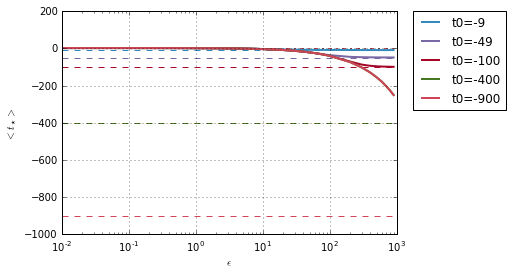

In [17]:
escapetime_avg_finitesizeeffects(-9,-49,-100,-400,-900,ntraj=10000)

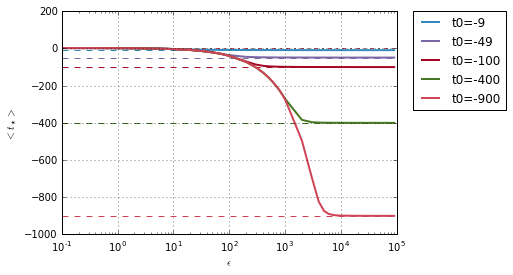

In [20]:
escapetime_avg_finitesizeeffects(-9,-49,-100,-400,-900,ntraj=10000,eps_exp_range=range(-1,5))

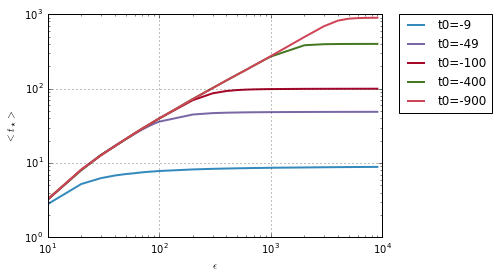

In [50]:
escapetime_avg_finitesizeeffects(-9,-49,-100,-400,-900,ntraj=10000,eps_exp_range=range(1,4),yscale='log')

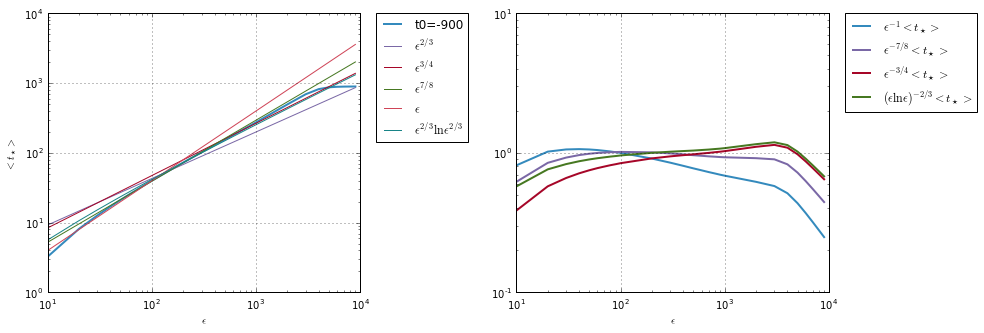

In [82]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))
for ax in (ax1,ax2):
    ax.set_xlabel('$\epsilon$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid()
ax1.set_ylabel('$<t_\star>$')
t0, x0, A = (-900,-30, 20)
ax1.plot(epsvals[avgt < 0],-avgt[avgt < 0],linewidth=2,label='t0='+str(t0))
ax1.plot(epsvals,2*epsvals**(2./3),label='$\epsilon^{2/3}$')
ax1.plot(epsvals,1.5*epsvals**(3./4),label='$\epsilon^{3/4}$')
ax1.plot(epsvals,0.7*epsvals**(7./8),label='$\epsilon^{7/8}$')
ax1.plot(epsvals,0.4*epsvals,label='$\epsilon$')
ax1.plot(epsvals,0.7*(epsvals*np.log(epsvals))**(2./3),label='$\epsilon^{2/3}\ln \epsilon ^{2/3}$')
ax1.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
ax2.plot(epsvals[avgt < 0],-avgt[avgt < 0]/(0.4*epsvals[avgt < 0]),linewidth=2,label='$\epsilon^{-1}<t_\star>$')
ax2.plot(epsvals[avgt < 0],-avgt[avgt < 0]/(0.7*epsvals[avgt < 0]**(7./8)),linewidth=2,label='$\epsilon^{-7/8}<t_\star>$')
ax2.plot(epsvals[avgt < 0],-avgt[avgt < 0]/(1.5*epsvals[avgt < 0]**(3./4)),linewidth=2,label='$\epsilon^{-3/4}<t_\star>$')
ax2.plot(epsvals[avgt < 0],-avgt[avgt < 0]/(0.7*(epsvals[avgt < 0]*np.log(epsvals[avgt < 0]))**(2./3)),linewidth=2,label='$(\epsilon\ln\epsilon)^{-2/3}<t_\star>$')
ax2.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
fig.subplots_adjust(wspace=0.5)
plt.show()

### Standard deviation of the escape time

In [48]:
def escapetime_std(x0,t0,*args,**kwargs):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$\epsilon$')
    ax.set_ylabel('$\sigma$')
    ax.set_xscale('log')
    ax.set_yscale(kwargs.get('yscale','linear'))
    ax.grid()
    epsvals = np.array([x*10.0**n for n in kwargs.get('eps_exp_range',xrange(-2,3)) for x in xrange(1,10)])
    for A in args:
        line, = ax.plot(epsvals,[np.std(stochtrans1D.StochSaddleNode(eps).escapetime_sample(x0,t0,A,**kwargs)) for eps in epsvals],linewidth=2,label='A='+str(A))
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    plt.show()

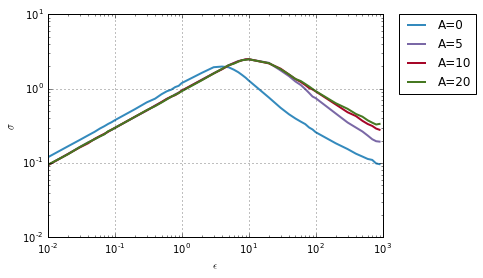

In [50]:
escapetime_std(-3,-9,0,5,10,20,ntraj=10000,yscale='log')

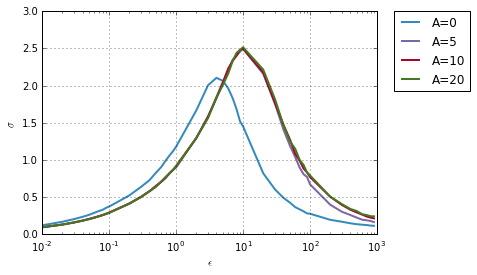

In [297]:
escapetime_std(-3,-9,0,5,10,20,ntraj=10000)

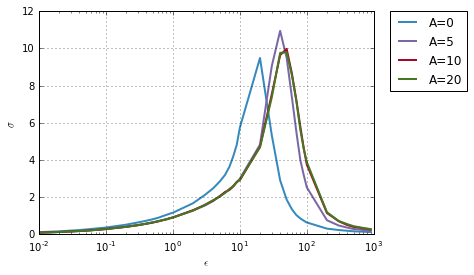

In [298]:
escapetime_std(-7,-49,0,5,10,20,ntraj=10000)

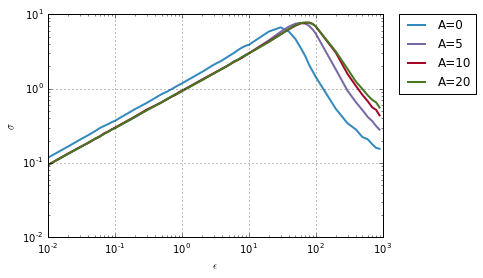

In [59]:
escapetime_std(-7,-49,0,5,10,20,ntraj=10000,yscale='log')

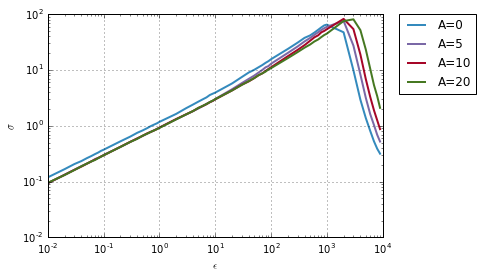

In [83]:
escapetime_std(-30,-900,0,5,10,20,ntraj=10000,yscale='log',eps_exp_range=range(-2,4))

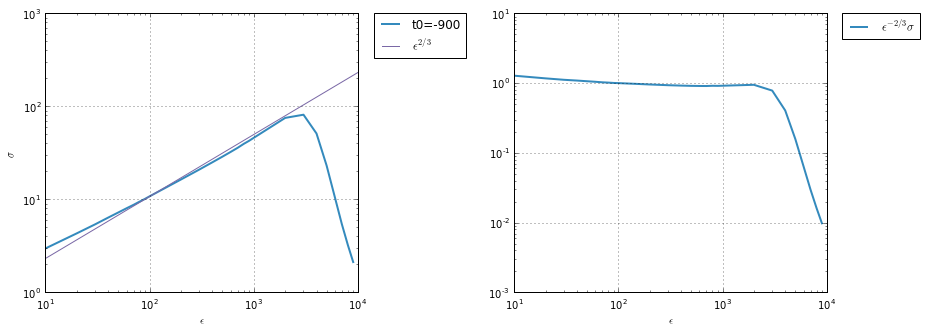

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))
for ax in (ax1,ax2):
    ax.set_xlabel('$\epsilon$')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid()
ax1.set_ylabel('$\sigma$')
t0, x0, A = (-900,-30, 20)
ax1.plot(epsvals,stdt,linewidth=2,label='t0='+str(t0))
ax1.plot(np.linspace(10,10000),0.5*np.linspace(10,10000)**(2./3),label='$\epsilon^{2/3}$')
#ax1.plot(np.linspace(10,10000),1.5*np.linspace(10,10000)**(3./4),label='$\epsilon^{3/4}$')
#ax1.plot(np.linspace(10,10000),0.7*np.linspace(10,10000)**(7./8),label='$\epsilon^{7/8}$')
#ax1.plot(np.linspace(10,10000),0.4*np.linspace(10,10000),label='$\epsilon$')
ax1.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
ax2.plot(epsvals,stdt/(0.5*epsvals**(2./3)),linewidth=2,label='$\epsilon^{-2/3}\sigma$')
#ax2.plot(epsvals,stdt/(0.7*epsvals[avgt < 0]**(7./8)),linewidth=2,label='$\epsilon^{-7/8}<t_\star>$')
#ax2.plot(epsvals,stdt/(1.5*epsvals[avgt < 0]**(3./4)),linewidth=2,label='$\epsilon^{-3/4}<t_\star>$')
ax2.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
fig.subplots_adjust(wspace=0.5)
plt.show()

### Pdf of the escape time

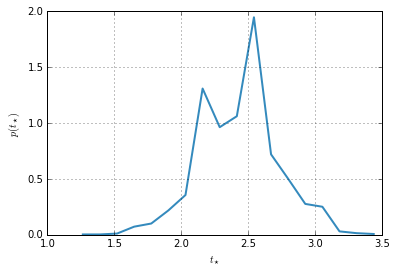

In [6]:
stoch_model_1.escapetime_pdf_plot(-3,-9,10,ntraj=20000)

In [4]:
def escapetime_pdf_cvg(x0,t0,A,model,**kwargs):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    for ax in (ax1,ax2):
        ax.set_xlabel('$t_\star$')
        ax.set_ylabel('$p(t_\star)$')
        ax.grid()    
    ax2.set_yscale('log')
    maxtraj = kwargs.get('maxtraj',100000)
    mintraj = kwargs.get('mintraj',100)
    samples = model.escapetime_sample(x0,t0,A,ntraj=maxtraj,**kwargs)
    while maxtraj >= mintraj:
        hist, rc = np.histogram(samples[:maxtraj],bins='doane',density=True)
        rc = rc[:-1] + 0.5*(rc[1]-rc[0])
        pdf_line1, = ax1.plot(rc,hist,linewidth=2,label='$n_{iter}=$'+str(maxtraj))
        pdf_line2, = ax2.plot(rc,hist,linewidth=2,label='$n_{iter}=$'+str(maxtraj))
        maxtraj /= 10
        if kwargs.get('show_avg',False):
            ax1.axvline(x=np.mean(samples[:maxtraj]),linewidth=1,color=pdf_line1.get_color())
            ax2.axvline(x=np.mean(samples[:maxtraj]),linewidth=1,color=pdf_line2.get_color())
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    fig.subplots_adjust(wspace=0.5)
    plt.show()

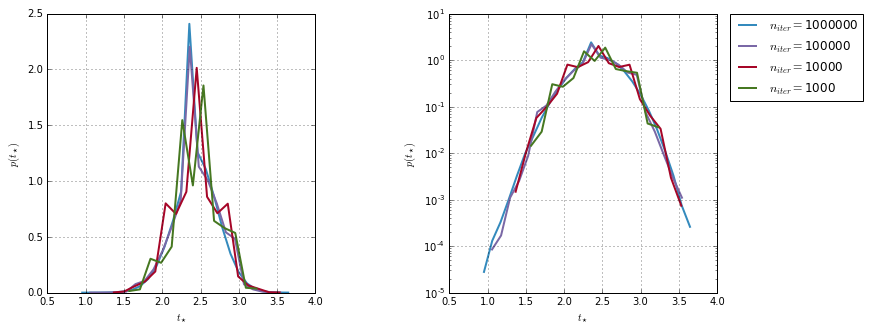

In [89]:
escapetime_pdf_cvg(-3,-9,10,stoch_model_1,maxtraj=1000000,mintraj=1000)

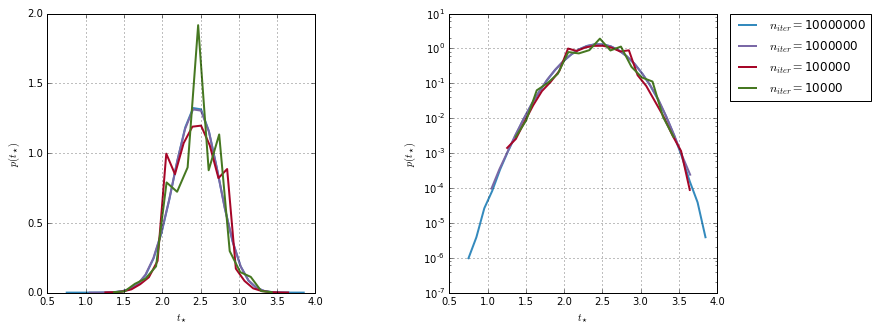

In [5]:
escapetime_pdf_cvg(-3,-9,10,stoch_model_1,maxtraj=10000000,mintraj=10000)

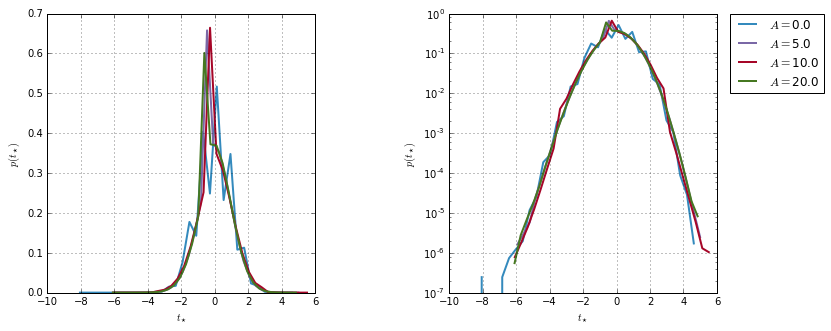

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
for ax in (ax1,ax2):
    ax.set_xlabel('$t_\star$')
    ax.set_ylabel('$p(t_\star)$')
    ax.grid()    
ax2.set_yscale('log')
for A in [0.,5.0,10.0,20.0]:
    pdf = stoch_model_1.escapetime_pdf(-3.0,-9.0,A,ntraj=10000000,standardize=True)
    pdf_line1, = ax1.plot(*pdf,linewidth=2,label='$A=$'+str(A))
    pdf_line2, = ax2.plot(*pdf,linewidth=2,label='$A=$'+str(A))
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
fig.subplots_adjust(wspace=0.5)
plt.show()

In [71]:
def escapetime_pdf_plot(x0,t0,A,*args,**kwargs):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    var = '(t_\star-<t_\star>)/\sigma' if kwargs.get('standardize',False) else 't_\star'
    for ax in (ax1,ax2):
        ax.set_xlabel('$'+var+'$')
        ax.set_ylabel('$p('+var+')$')
        ax.grid()    
    ax2.set_yscale('log')
    for model in args:
        pdf = model.escapetime_pdf(x0,t0,A,**kwargs)
        pdf_line1, = ax1.plot(*pdf,linewidth=2,label='$\epsilon=$'+str(model.D0))
        pdf_line2, = ax2.plot(*pdf,linewidth=2,label='$\epsilon=$'+str(model.D0))
    if kwargs.get('fit',False):
        for ax in (ax1,ax2):
            xx = np.linspace(*ax.get_xlim())
            ax.plot(xx,np.exp(-xx**2/2)/np.sqrt(2*np.pi),color='black')
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    fig.subplots_adjust(wspace=0.5)
    plt.show()

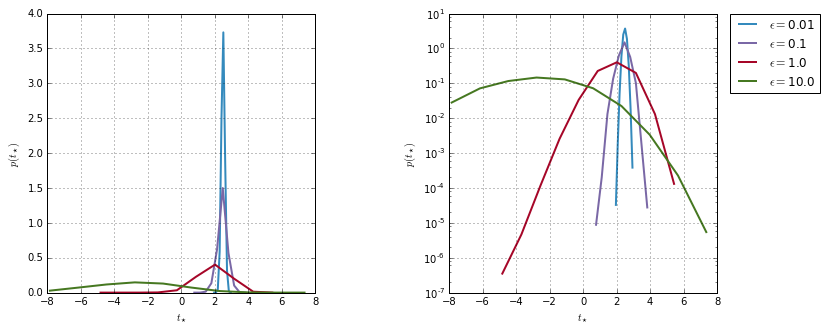

In [36]:
escapetime_pdf_plot(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,bins=10)

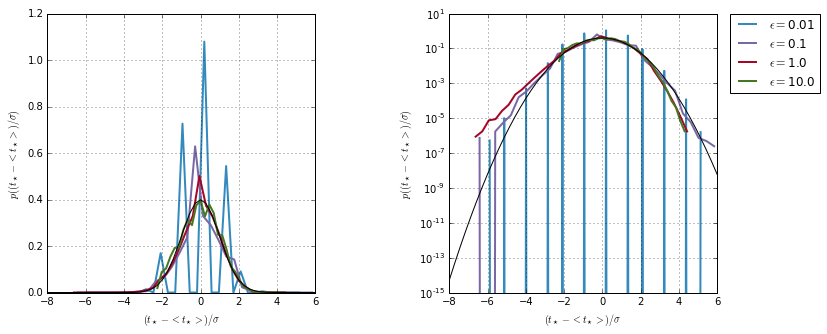

In [16]:
escapetime_pdf_plot(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,standardize=True,fit=True)

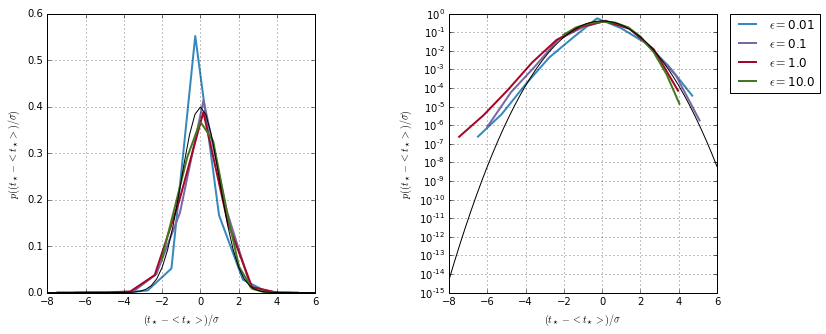

In [35]:
escapetime_pdf_plot(-3,-9,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,standardize=True,fit=True,bins=10)

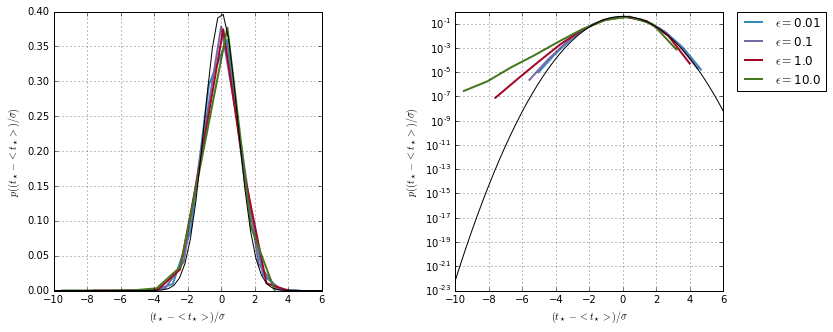

In [72]:
escapetime_pdf_plot(-7,-49,10,stoch_model_2,stoch_model_1,stoch_model_0,stoch_model_00,ntraj=10000000,standardize=True,fit=True,bins=10)

## Fokker-Planck equation

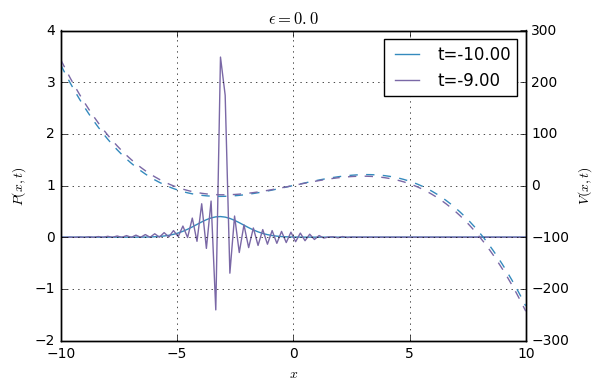

In [7]:
stochtrans1D.StochSaddleNode(0.0).pdfplot(-10.0,-9.0,potential=True,dt=0.0001,Np=1000)

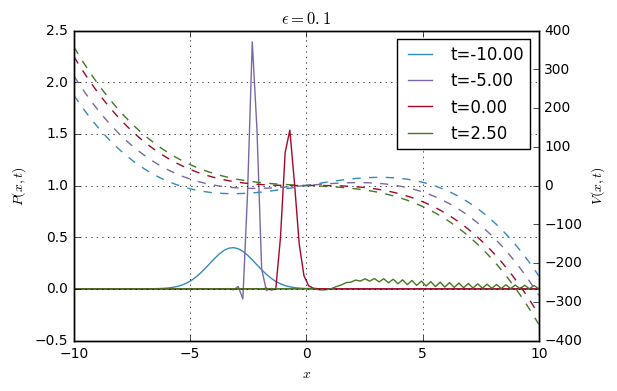

In [16]:
stochtrans1D.StochSaddleNode(0.1).pdfplot(-10.0,-5.0,0.0,2.5,potential=True,dt=0.0001)

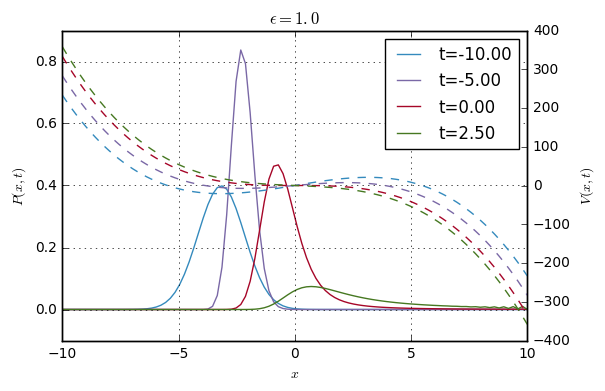

In [10]:
stochtrans1D.StochSaddleNode(1.0).pdfplot(-10.0,-5.0,0.0,2.5,potential=True,dt=0.0001)

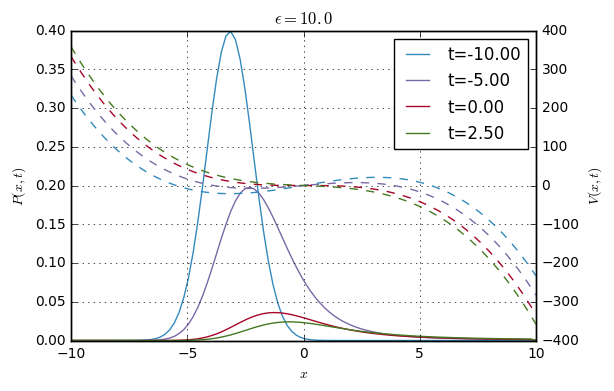

In [4]:
stochtrans1D.StochSaddleNode(10.0).pdfplot(-10.0,-5.0,0.0,2.5,potential=True,dt=0.001)

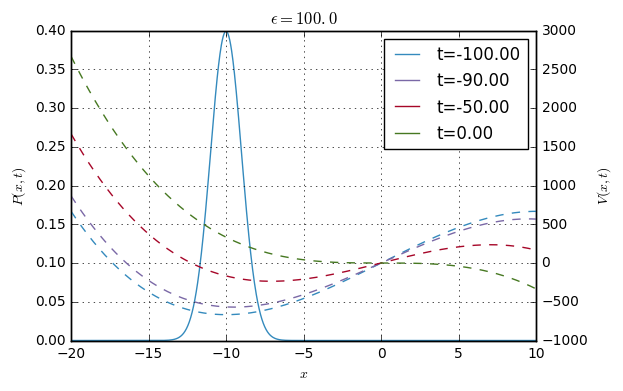

In [46]:
stochtrans1D.StochSaddleNode(100.0).pdfplot(-100.0,-90.0,-50.0,0.0,potential=True,dt=0.00001,bounds=(-20.0,10.0),npts=1000)

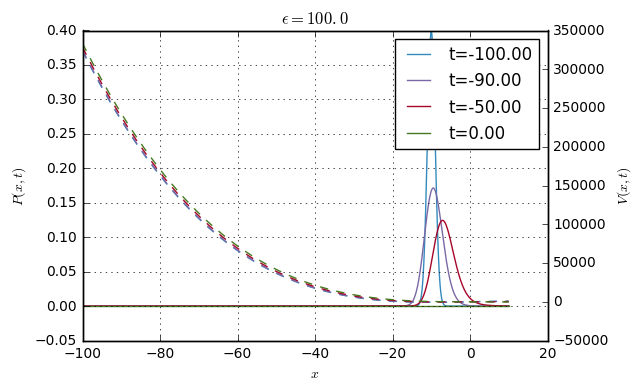

In [47]:
stochtrans1D.StochSaddleNode(100.0).pdfplot(-100.0,-90.0,-50.0,0.0,potential=True,dt=0.00001,bounds=(-100.0,10.0),npts=1000)